<h1 style="text-align: center;">Hourly Energy Consumption</h1>
<h5 style="text-align: center;">Over 10 years of hourly energy consumption data from PJM in Megawatts</h5>
<h4 style="text-align: center;">Ghani Haider |  github.com/Ghani-Haider/</h4>

The [dataset](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption) contains hourly power consumption data from PJM's website (an electric transmission organization in USA) in megawatts (MW). The goal is to understand the trends in energy consumption around hours of the day, holidays, or long term trends and to build a model to predict energy consumption over a certain period.

The dataset consist of following features:
- Date : year-month-day hour:min:sec
- PJME_MW (target variable) : Energy consumption (mega-watts)

<h3>Objectives</h3>
<ul>
    <li> Dataset Pre-processing.
    <li> Feature Extraction
        <ul>
            <li> Date time Features
            <li> Lag Features
            <li> Explaining Forecasting Horizon
        </ul>    
    <li> Exploratory Data Analysis (EDA)
    <li> Developing Prediction Model
    <li> Preformance Evaluation
    <li> Conclusion
</ul>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Read the Dataset</h2>

In [75]:
# read Date column as datetime and set as index
df = pd.read_csv('./data/PJME_hourly.csv', parse_dates=[0], index_col=0)

In [76]:
df.head(3)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


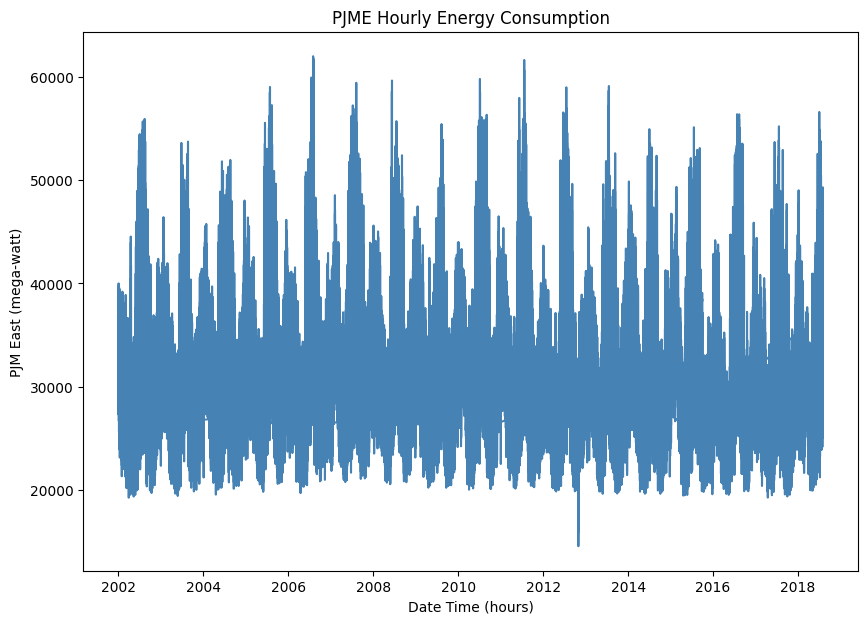

In [78]:
# plotting the data
def plot_df():
    plt.figure(figsize=(10, 7))
    plt.plot(df.index, df['PJME_MW'], color='steelblue')
    plt.title('PJME Hourly Energy Consumption')
    plt.xlabel('Date Time (hours)')
    plt.ylabel('PJM East (mega-watt)')
    plt.show()

plot_df()

<h2>Data Pre-processing</h2>

<h3>Handling Missing Data</h3>

In [79]:
print(f"The column has no missing values, so we're good to go.")
# missing value per column
df.isna().sum()

The column has no missing values, so we're good to go.


PJME_MW    0
dtype: int64

<h3>Outlier Removal</h3>

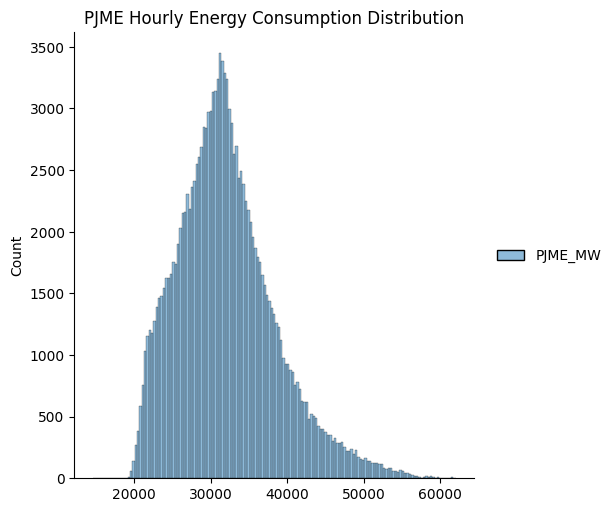

In [80]:
# plotting distribution to look for outliers
sns.displot(data=df, color='steelblue')
plt.title('PJME Hourly Energy Consumption Distribution')
plt.show()

Text(0.5, 1.0, 'Potential Outliers')

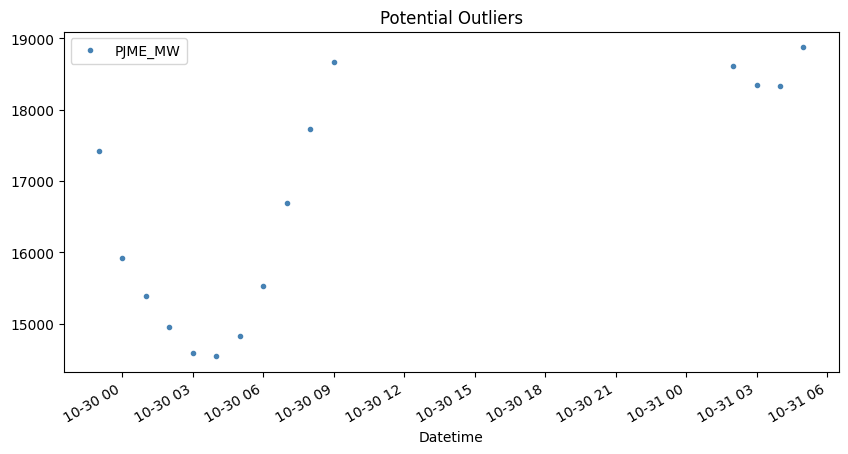

In [81]:
# values less than 20,000 and greater than 60,000 are potential outliers
df.query('PJME_MW <= 19000' or 'PJME_MW >= 65000').plot(figsize=(10, 5), style='.', color='steelblue')
plt.title('Potential Outliers')

In [82]:
# removing the outliers
df = df.query('PJME_MW > 19000' or 'PJME_MW < 65000')

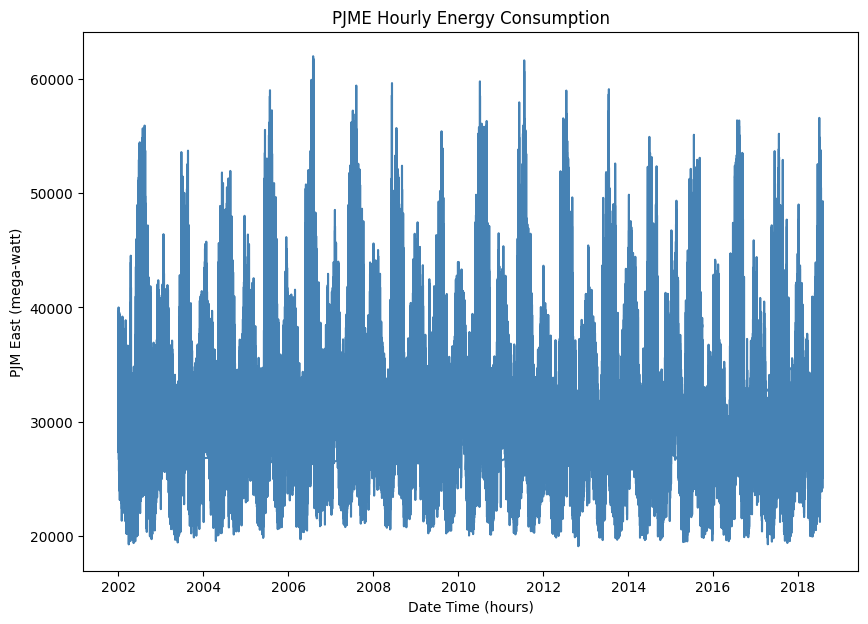

In [83]:
# data after removing outliers
plot_df()

<h2>Feature Extraction</h2>

Extracting features from "Datetime" index

In [84]:
# creating time series features based on time series index.
def create_date_feat(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

df = create_date_feat(df)
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


<h3>Creating Lag Features</h3>

Lag features are values at prior timesteps that are considered useful because they are created on the assumption that what happened in the past can influence or contain a sort of intrinsic information about the future.

One important point to remember is that lag features cannot have values back further than the forecasting horizon (which is the length of time into the future for which forecasts are to be prepared. These generally vary from short-term forecasting horizons (less than three months) to long-term horizons (more than two years).

In [94]:
def create_lag_feat(df):
    # get datetime and target variable as dict
    target_map = df['PJME_MW'].to_dict()

    # add lag features
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map) # one year
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map) # two years
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map) # three years

    return df

df = create_lag_feat(df)

## EDA (create features hour, day etc and see trends in it)

Exploring the relationship of date features with target (PJME_MW energy consumption)

In [13]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1,30393.0,NaN,NaN
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1,29265.0,NaN,NaN
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1,28357.0,NaN,NaN
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1,27899.0,NaN,NaN
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1,28057.0,NaN,NaN


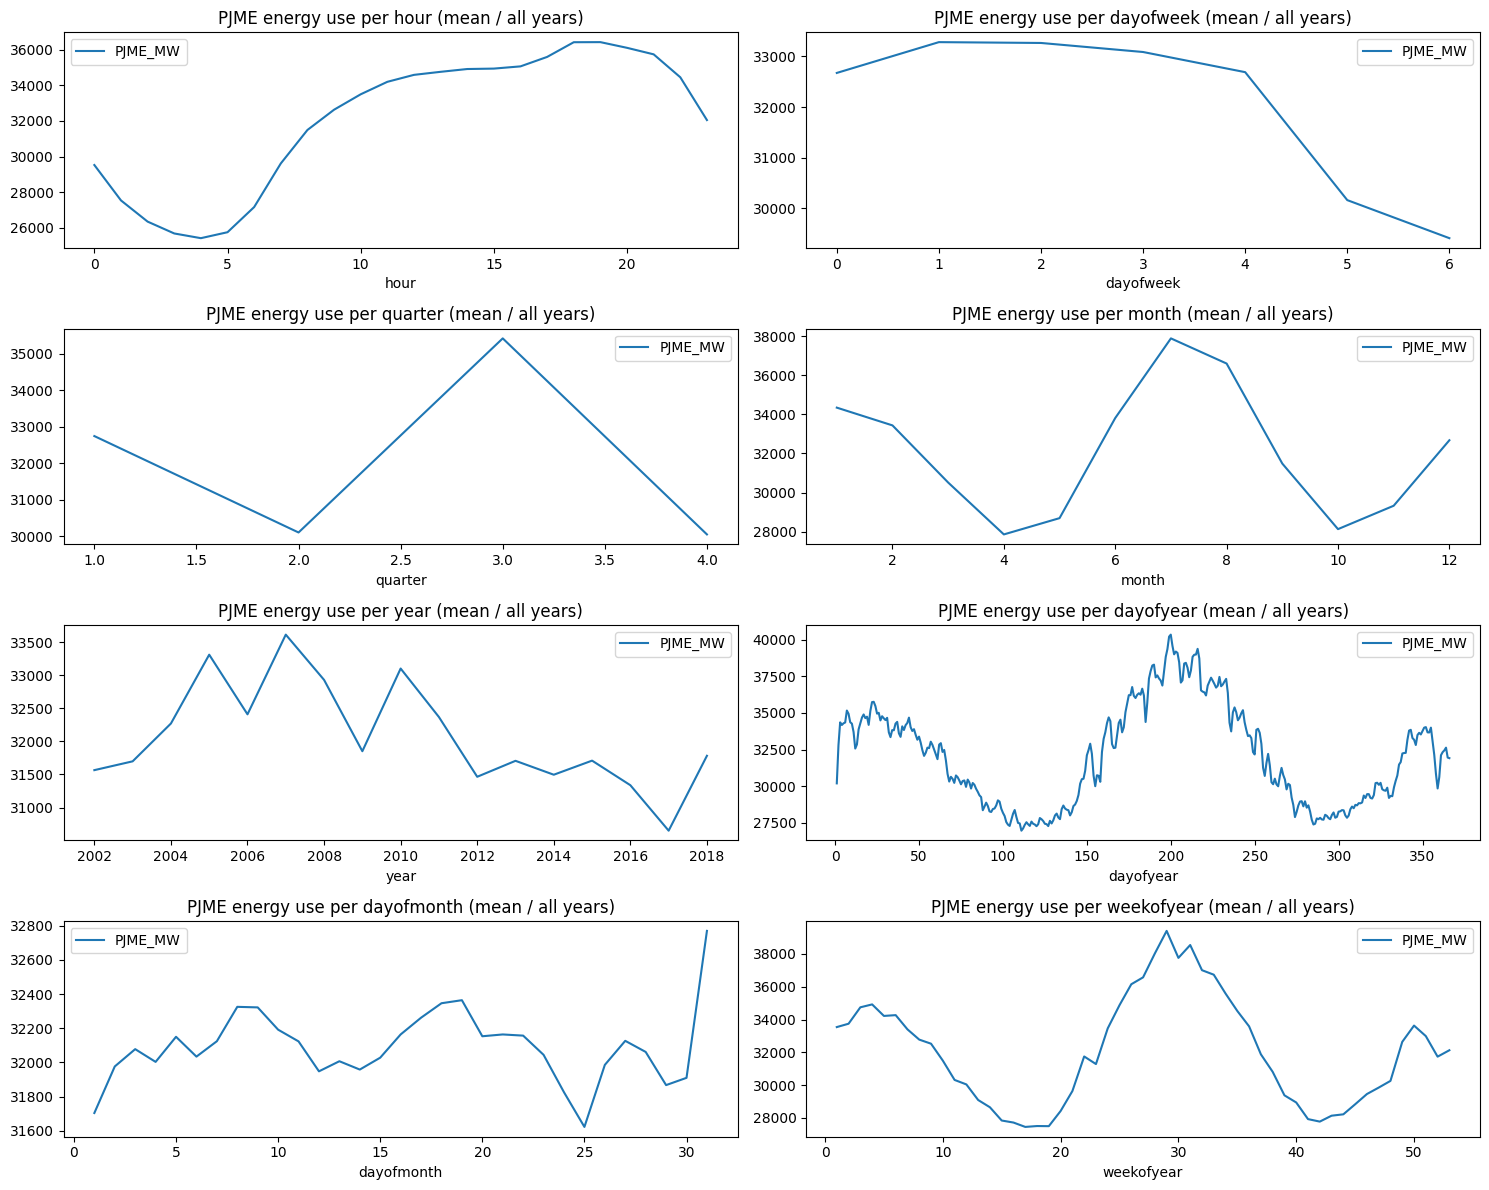

In [14]:
# plot trends in energy consumption
def date_feat_plots(df, dimension, features):
    fig, ax = plt.subplots(nrows=dimension[0], ncols=dimension[1], figsize=(15,12))
    graph = 0
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            df.groupby(features[graph]).agg({'PJME_MW': 'mean'}).plot(title='PJME energy use per '+(features[graph])+' (mean / all years)', ax=ax[i][j])
            graph += 1
    plt.tight_layout()
    plt.show()

# get datetime features to plot
date_cols = df.columns.drop(['lag1', 'lag2', 'lag3', 'PJME_MW'])
date_feat_plots(df, [4,2], date_cols)

Following observations can be made from the graphs:

- Hours: Energy consumption is high is during working hours/ daytime and less during the evening.
- Days of Week: Consumption is high during weekdays and less during weekends.
- Months/ Quarter/ Weeks/ Days of the year: Consumption is high during summers and then winters. These features also might be correlated.
- Years: Energy consumption has decreased a little after 2010.

All in all, we can observe seasonality and periodic trend in the data, which is quite typical of time series data.

### Feature correlation with Energy Consumption (target: PJME_MW)

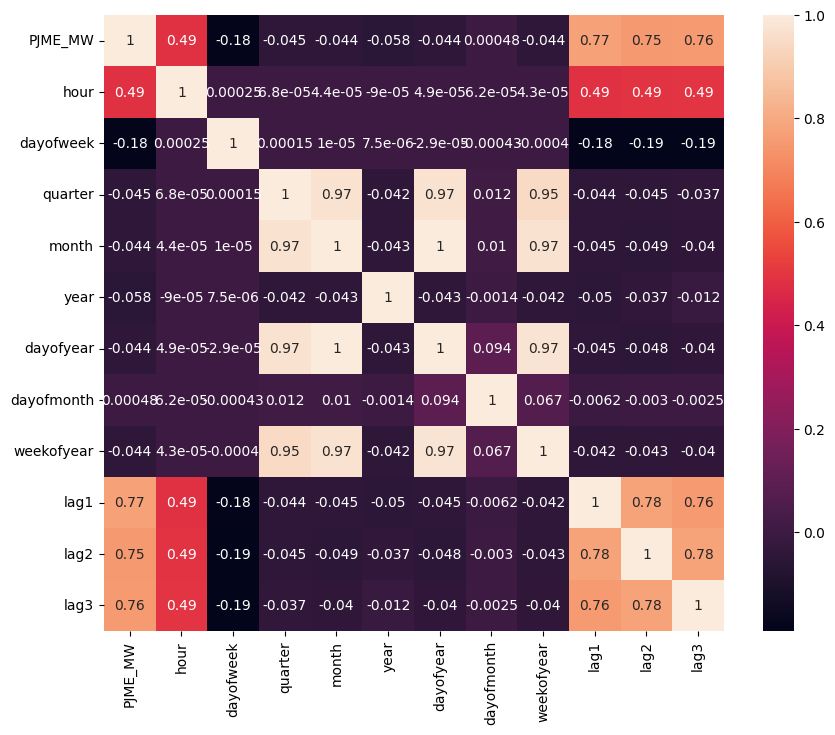

In [15]:
# plotting correlation as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Feature Selection

- Dropping "weekofyear" due to multicollinearity with "month" and "quarter" and "dayofyear".
- Dropping "quarter" due to multicollinearity with "month" and "weekofyear" and "dayofyear".
- Dropping "dayofyear" due to multicollinearity with "month" and "weekofyear" and "quarter".

In [89]:
df = df.drop(["weekofyear", "quarter", "dayofyear"], axis=1)

<h2>Creating Prediction Model</h2>

### Train Test Split

In case of time series data, we don't want the information into the future to train our model (the objective in this case is ofcourse to predict those), therefore we will opt for TimeSeriesSplit, which ensures that test datasets have later values than the train datasets.

In [22]:
from sklearn.model_selection import TimeSeriesSplit

### performing cross-validation ###
# splitting time series data into 5 folds,
# keeping the test size as 1 year,
# and the gap between train and test set of 1 hour
time_series_split = TimeSeriesSplit(n_splits=5, test_size=24*365, gap=24)

# sorting the dataset before split
df = df.sort_index()
# split generator
df_split = time_series_split.split(df)

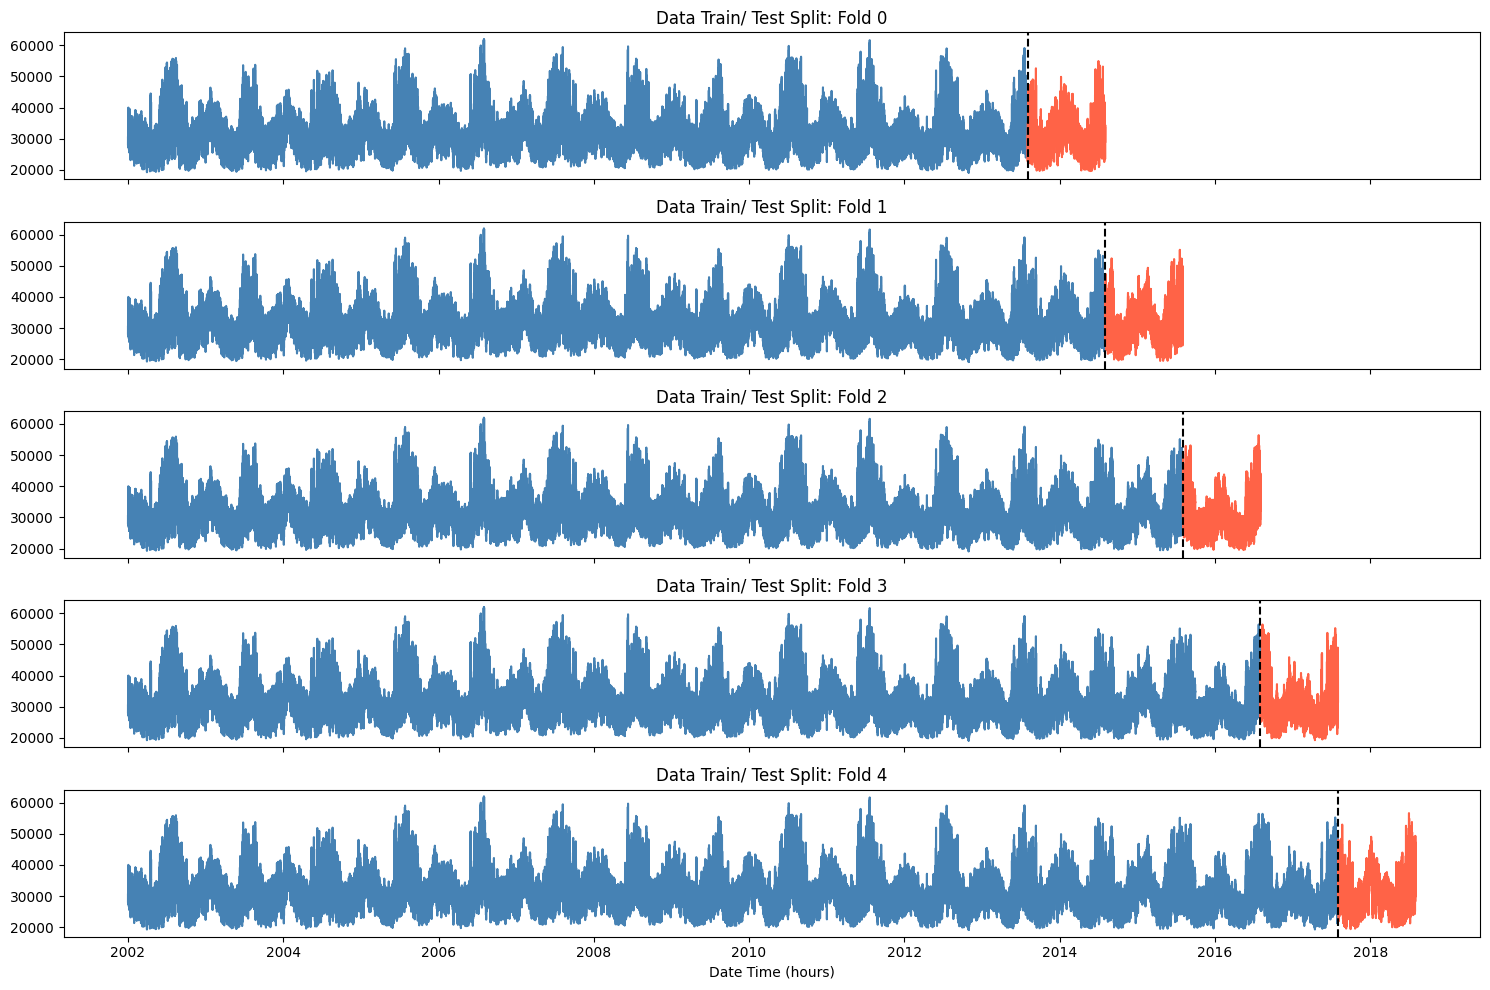

In [35]:
# visualize train test split
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 10), sharex=True)

fold = 0
# get train/ test values for each fold and plot
for train_idx, test_idx in df_split:
    # get values
    train = df.iloc[train_idx]
    test = df.iloc[test_idx]
    # plot values
    ax[fold].plot(train.index, train['PJME_MW'], color='steelblue', label='Train Set')
    ax[fold].plot(test.index, test['PJME_MW'], color='tomato', label='Test Set')
    ax[fold].axvline(test.index[0], color='black', ls='--')
    ax[fold].set_title(f"Data Train/ Test Split: Fold {fold}")
    fold+=1

plt.xlabel('Date Time (hours)')
plt.tight_layout()
plt.show()

### Model Training and Evaluation

I have choosen XGBREgressor model for time series forecasting.

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

rmse_score = []
predictions = []

for train_idx, test_idx in time_series_split.split(df):
    # train, test data
    train = df.iloc[train_idx]
    test = df.iloc[test_idx]

    # split into feature, target
    X_train = train.drop('PJME_MW', axis=1)
    X_test = test.drop('PJME_MW', axis=1)
    y_train = train['PJME_MW']
    y_test = test['PJME_MW']

    model = XGBRegressor(base_score=0.5,
                         booster='gbtree',
                         n_estimators=1000,
                         early_stopping_rounds=50,
                         objective='reg:squarederror',
                         max_depth=3,
                         learning_rate=0.01)
    
    # fit
    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train) ,(X_test, y_test)],
              verbose=100)
    
    # predict
    y_pred = model.predict(X_test)
    predictions.append([y_test, y_pred])
    # model evaluation (rmse)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_score.append(rmse)

[0]	validation_0-rmse:32732.50147	validation_1-rmse:31956.66494
[100]	validation_0-rmse:12534.39016	validation_1-rmse:11912.87340
[200]	validation_0-rmse:5761.39279	validation_1-rmse:5374.82731
[300]	validation_0-rmse:3904.90091	validation_1-rmse:3914.01161
[400]	validation_0-rmse:3471.17261	validation_1-rmse:3785.14723
[444]	validation_0-rmse:3407.26773	validation_1-rmse:3789.04727
[0]	validation_0-rmse:32672.16154	validation_1-rmse:32138.88680
[100]	validation_0-rmse:12515.20147	validation_1-rmse:12226.31150
[200]	validation_0-rmse:5762.81489	validation_1-rmse:5665.41140
[300]	validation_0-rmse:3935.53394	validation_1-rmse:3960.42125
[400]	validation_0-rmse:3511.47473	validation_1-rmse:3634.00018
[500]	validation_0-rmse:3388.99226	validation_1-rmse:3566.02412
[600]	validation_0-rmse:3333.26565	validation_1-rmse:3541.66730
[700]	validation_0-rmse:3293.74093	validation_1-rmse:3509.64230
[800]	validation_0-rmse:3265.38542	validation_1-rmse:3491.58464
[900]	validation_0-rmse:3240.43284	v

#### Model Evaluation: RMSE Value

In [24]:
print(f"Mean Value of PJME_MW:\t{df['PJME_MW'].mean():0.03f}")
print(f"Avg RMSE:\t{np.mean(rmse_score):0.03f}")
print(f"RMSE Each Fold:\t{rmse_score}")

Mean Value of PJME_MW:	32081.810
Avg RMSE:	3747.991
RMSE Each Fold:	[3782.4549274580972, 3460.45378484829, 3529.966844224359, 4028.7415145486752, 3938.337668537517]


#### Feature Importance 

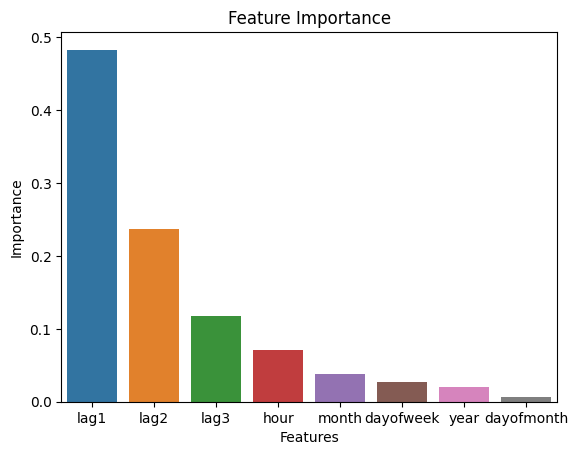

In [65]:
imp_feat = pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importance']).sort_values(by='importance', ascending=False)

sns.barplot(data=imp_feat, x=imp_feat.index, y='importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

#### Visualizing Predictions

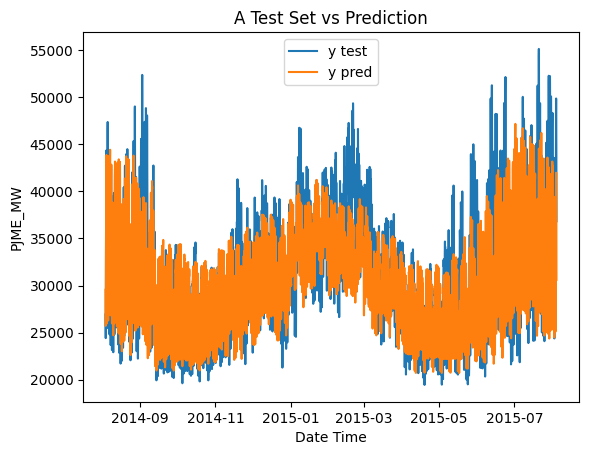

In [63]:
test = predictions[1][0]
pred = predictions[1][1]

fig, ax = plt.subplots(sharex=True)
ax.plot(test.index, test, label='y test')
ax.plot(test.index, pred, label='y pred')

plt.title('A Test Set vs Prediction')
plt.xlabel('Date Time')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

<h2>Complete Model Training and Predicting Future Energy Consumption</h2>

After training completely on the dataset, we can create future date time for which we can predict the energy consumption. This is how we would proceed from here:
- Retrain on all data
- Predict on future datetime values
- Save the final model

#### Retrain the Model

In [66]:
# retraining model on complete data
X = df.drop('PJME_MW', axis=1).values
y = df['PJME_MW']

# changed n_estimators=500 to avoid overfitting (as observed during cross-validation above)
XGBReg_model = XGBRegressor(base_score=0.5,
                     booster='gbtree',
                     n_estimators=500,
                     early_stopping_rounds=50,
                     objective='reg:squarederror',
                     max_depth=3,
                     learning_rate=0.01)

XGBReg_model.fit(X, y,
          eval_set=[(X, y)],
          verbose=100)

[0]	validation_0-rmse:32403.90575
[100]	validation_0-rmse:12428.77904
[200]	validation_0-rmse:5759.79698
[300]	validation_0-rmse:3995.18478
[400]	validation_0-rmse:3602.08777
[499]	validation_0-rmse:3492.63859


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Predicting Future Values

Predicting 1 year energy consumption.
- Create a dataframe with a Date Range
- Create Date Features from Date
- Concat with original data to create Lag Features
- Predict

In [98]:
# creating date range from 2018-08-03 (last date in df) to 2019-08-01
future_date = pd.date_range(df.index.max(), '2019-08-01', freq='h')
future_df = pd.DataFrame(index = future_date) # create the dataframe

# adding date features and dropping irrelevant features
future_df = create_date_feat(future_df).drop(["weekofyear", "quarter", "dayofyear"], axis=1)

# adding lag features
future_df['isFuture'] = True
df['isFuture'] = False
# concat original df and future_df
# create lag features using concatenated df
# query and only return future_df index (2018-08-03 to 2019-08-01)
future_df = create_lag_feat(pd.concat([df, future_df], axis=0)).query('isFuture')
future_df = future_df.drop('isFuture', axis=1)

future_df.head()

,PJME_MW,hour,dayofweek,month,year,dayofmonth,lag1,lag2,lag3
2018-08-03 00:00:00,NaN,0,4,8,2018,3,33539.0,32094.0,31695.0
2018-08-03 01:00:00,NaN,1,4,8,2018,3,30781.0,29503.0,29128.0
2018-08-03 02:00:00,NaN,2,4,8,2018,3,29015.0,27712.0,27373.0
2018-08-03 03:00:00,NaN,3,4,8,2018,3,27884.0,26535.0,26233.0
2018-08-03 04:00:00,NaN,4,4,8,2018,3,27223.0,25870.0,25643.0


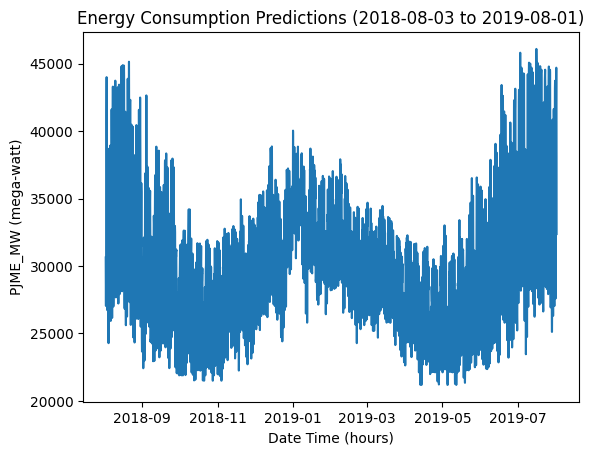

In [101]:
# predict PJME_MW
X_future = future_df.drop('PJME_MW', axis=1)
fut_pred = XGBReg_model.predict(X_future)

# plot
plt.plot(X_future.index, fut_pred)
plt.title('Energy Consumption Predictions (2018-08-03 to 2019-08-01)')
plt.xlabel('Date Time (hours)')
plt.ylabel('PJME_MW (mega-watt)')

plt.show()

#### Saving the Model

In [103]:
from joblib import dump

dump(XGBReg_model, './model/pjme_mw_energy_consumption.joblib')

['./model/pjme_mw_energy_consumption.joblib']